In [1]:
from proximitylib import *

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"

## Periodic case

In [11]:
chain = hybrid_ring(chain1D(144, wt = 0), chain1D(199,u = 0.75, v=-1.5), t_int = -1)

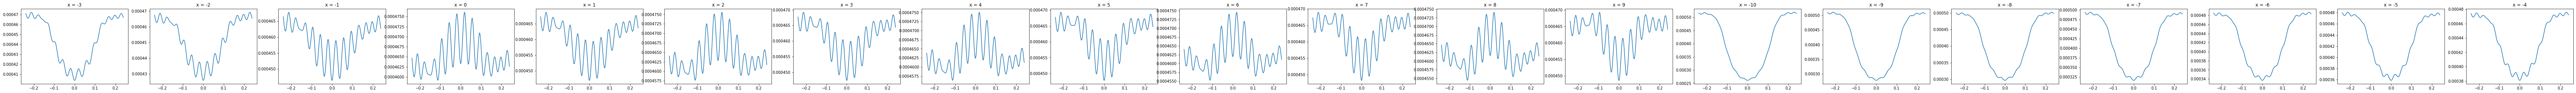

In [15]:
Num_es = 2000
LDOSs, eex = chain.get_LDOS(gam = 0.03, Num_es = 2000)
fig, axes = plt.subplots(figsize = (120,3.6), ncols = 20)
for x in range(-10,10):
    axes[x+3].plot(eex[Num_es//2-100:Num_es//2+100], LDOSs[x][Num_es//2-100:Num_es//2+100])
    axes[x+3].set_title("x = {}".format(x))

## Disordered case

In [66]:
LDOS_dis = pickle.load(open("LDOS_dis.p","rb"))
[print((key, len(LDOS_dis[key][0]))) for key in LDOS_dis.keys()]

L = Fibonacci[9]
wt = 0.1
LSC = 199
Num_es = 2000

((89, 0.1), 500)


In [60]:
N_trials = 493
xs = np.arange(-4,4)

LDOSs = {}
for x in xs:
    LDOSs[x] = []
for i in tqdm(range(N_trials)):
    chain = hybrid_ring (chain1D(L, wt =wt), chain1D(LSC,u = 0.75,v=-1.5), t_int = -1, beta = 4000)
    temp, _ = chain.get_LDOS(gam = 0.03, Num_es=Num_es)
    for x in xs:
        LDOSs[x].append(temp[x])

_, LDOSs["eex"] = chain.get_LDOS(gam = 0.03, Num_es = Num_es)

100%|██████████| 493/493 [28:09<00:00,  3.32s/it]


In [61]:
temp = {}
temp['eex'] = LDOSs['eex']
xs = list(LDOSs.keys())[:-1]
for x in xs:
    temp[x] = LDOS_dis[(L,wt)][x]+LDOSs[x]
LDOS_dis[(L,wt)] = temp
    

In [72]:
pickle.dump(LDOS_dis, open("LDOS_dis.p","wb"))

## Mini-Anlyzer

In [9]:
L = 89
wt = 0.1
LDOS_dis = pickle.load(open("LDOS_dis.p", "rb"))

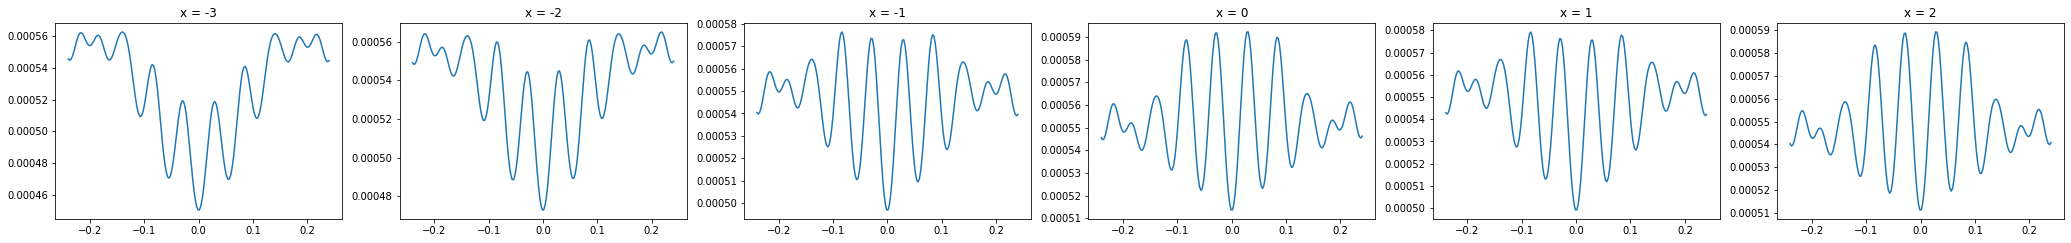

In [10]:
LDOSs = LDOS_dis[(L,wt)]
xs = list(LDOSs.keys())[:-1]
LDOS_avg = {}
for x in xs:
    LDOS_avg[x] = np.mean(LDOSs[x],axis = 0)
fig, axes = plt.subplots(figsize = (36,3.6), ncols = 6)
for x in range(-3,3):
    axes[x+3].plot(LDOSs["eex"][Num_es//2-100:Num_es//2+100], LDOS_avg[x][Num_es//2-100:Num_es//2+100])
    axes[x+3].set_title("x = {}".format(x))